# Analytics Notebook

This notebook provides the code to locally download the CVEFree dataset and then provide some examples for visualisations that can be produced from it.

Run the following to download the CVEFree dataset to your local directory:

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://kazepublic.blob.core.windows.net/cvefree/data.json ', filename='../data.json')

Import matplot and json to open the .json data file and prepare to make plots:

In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd

# Opening JSON file.
f = open('../data.json')
 
# Return JSON object as a dictionary.
data = json.load(f)

Load Dictionary into Pandas dataframe and print a table of random CVE samples:

In [20]:
pd.set_option('display.min_rows', 20)
df = pd.DataFrame(data['cves'])
display(df.sample(n=5))

,cve,last_modified_datetime,published_datetime,cvssv2,cvssv3,epss,cti_count,social_media_audience,vendors,software_cpes,v_score,cisa,metasploit
25417,CVE-2010-3441,2020-08-14T16:54:00.000Z,2011-02-18T17:00:00.000Z,7.5,NaN,0.112700000,NaN,NaN,"[moinejf, fedoraproject]",[cpe:2.3:o:fedoraproject:fedora:14:*:*:*:*:*:*...,0.414670,None,None
105248,CVE-2020-7128,2021-07-21T11:39:00.000Z,2020-11-04T20:15:00.000Z,10.0,9.8,0.010860000,NaN,NaN,[arubanetworks],[cpe:2.3:a:arubanetworks:airwave_glass:*:*:*:*...,0.476272,None,None
88033,CVE-2019-7140,2019-08-21T16:20:00.000Z,2019-05-22T13:29:00.000Z,4.3,NaN,0.011260000,NaN,NaN,"[apple, adobe, microsoft]","[cpe:2.3:o:apple:mac_os_x:-:*:*:*:*:*:*:*, cpe...",0.212099,None,None
50210,CVE-2016-1769,2017-09-08T01:29:00.000Z,2016-03-24T01:59:00.000Z,6.8,NaN,0.060170000,NaN,NaN,[apple],[cpe:2.3:o:apple:mac_os_x:*:*:*:*:*:*:*:*],0.355774,None,None
276518,CVE-2022-40648,2022-09-19T18:13:00.000Z,2022-09-15T16:15:00.000Z,NaN,7.8,0.011030000,NaN,NaN,[ansys],[cpe:2.3:a:ansys:spaceclaim:2022:r1:*:*:*:*:*:*],0.380221,None,None


# Histograms

The following code does a histogram count of for a number of scores and metrics to show their distributions for various insights:

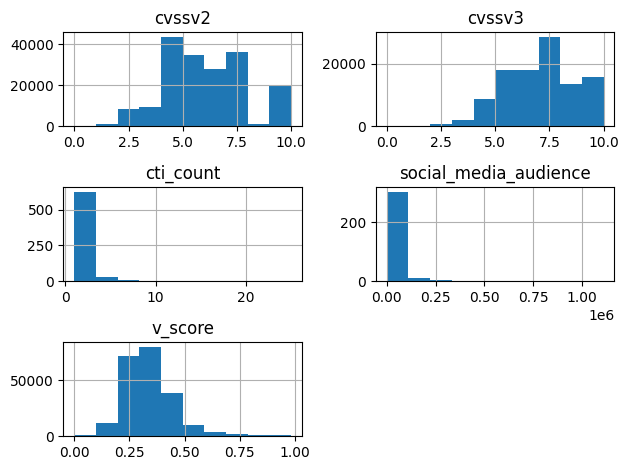

In [4]:
df.hist()
plt.tight_layout()

# Vendor & Software Word Clouds

Installs the wordcloud package and then extracts strings of all the vendors and software associated with CVEs to create appopriate word cloud plots.

In [ ]:
!pip install wordcloud

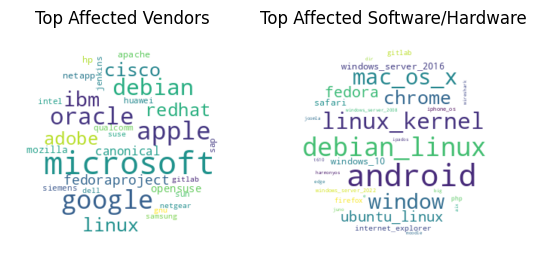

In [17]:
from wordcloud import WordCloud

# Concatanate strings of vendors and software for format for wordcloud - This can be optimised considerably.
str_vendors = ""
str_software = ""
for i in data['cves']:
    if i['vendors'] is not None:
        for ven in i['vendors']:
            str_vendors += " " + ven.strip()
    if i['software_cpes']:
        str_software += " " + i['software_cpes'][0].split(':')[4]  # Only take first CPE. Misses values but processing all is performance heavy. Process all for accurate count.

# Use numpy for creating wordcloud circle mask.
import numpy as np
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

# Create vendor count wordcloud.
wc_vendor = WordCloud(background_color = "white", width = 800, height = 400, max_words=30, collocations=False, mask=mask, colormap='viridis').generate(str_vendors)

# Create software/hardware count wordcloud.
wc_software = WordCloud(background_color = "white", width = 800, height = 400, max_words=30, collocations=False, mask=mask, colormap='viridis').generate(str_software)

fig, axes = plt.subplots(1, 2)
axes[0].set_title("Top Affected Vendors")
axes[0].imshow(wc_vendor, interpolation="bilinear")
axes[1].set_title("Top Affected Software/Hardware")
axes[1].imshow(wc_software, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

# Top 10 Social Media

Sort CVEs by the top 10 trending on social media in the last 30 day window and print as table of information.

In [21]:
# Sort list by social media audience then create dataframe.
newlist = sorted(data['cves'], key=lambda d: d['social_media_audience'] if (d['social_media_audience'] is not None) else 0, reverse=True)
df = pd.DataFrame(newlist[:10])
display(df[['cve', 'cvssv2', 'cvssv3', 'epss', 'cti_count', 'social_media_audience']])

,cve,cvssv2,cvssv3,epss,cti_count,social_media_audience
0,CVE-2023-50164,None,9.8,0.097990000,4.0,1109757
1,CVE-2023-50428,None,5.3,0.000520000,NaN,931232
2,CVE-2023-45866,None,6.3,0.000450000,5.0,539671
3,CVE-2023-28252,None,7.8,0.008860000,3.0,321202
4,CVE-2023-51385,None,6.5,0.001550000,NaN,269238
5,CVE-2023-4863,None,8.8,0.410100000,2.0,255707
6,CVE-2023-48795,None,5.9,None,NaN,249635
7,CVE-2023-3390,None,7.8,0.000420000,NaN,181349
8,CVE-2023-29357,None,9.8,0.001240000,NaN,173136
9,CVE-2023-7102,None,NaN,None,4.0,172811
